In [55]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [56]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Вычисление "скорректировнного R2"
    # Сначала вычислим коэффициент детерминации R2
    r2 = model.score(X_test, y_test)
    # Размер тестовой выборки
    n = X_test.shape[0]
    # Количество признаков
    p = X_test.shape[1]
    # Вычислим "Скорректировнный R2"
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [57]:
df = pd.read_csv('/content/Student_Performance.csv')

In [58]:
df.columns


Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [60]:
# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Применение кодирования к категориальному признаку
df['Extracurricular Activities'] = label_encoder.fit_transform(df['Extracurricular Activities'])

# Проверка результата
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [61]:
# Инициализация scaler'а
scaler = MinMaxScaler()

# Нормализация числовых признаков
numerical_features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced','Extracurricular Activities']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Проверка результата
print(df.head())

   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0          0.750         1.000000                         1.0          1.0   
1          0.375         0.711864                         0.0          0.0   
2          0.875         0.186441                         1.0          0.6   
3          0.500         0.203390                         1.0          0.2   
4          0.750         0.593220                         0.0          0.8   

   Sample Question Papers Practiced  Performance Index  
0                          0.111111               91.0  
1                          0.222222               65.0  
2                          0.222222               45.0  
3                          0.222222               36.0  
4                          0.555556               66.0  


In [62]:

# подготавливаем датасет к обучению

X = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']
print(f'X shape: {X.shape} | y shape: {y.shape} ')



X shape: (10000, 5) | y shape: (10000,) 


In [63]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [64]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [65]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  2.0539
  R2: 0.9887
 Adjusted R2: 0.9887
 Cross Validated R2: 0.9887


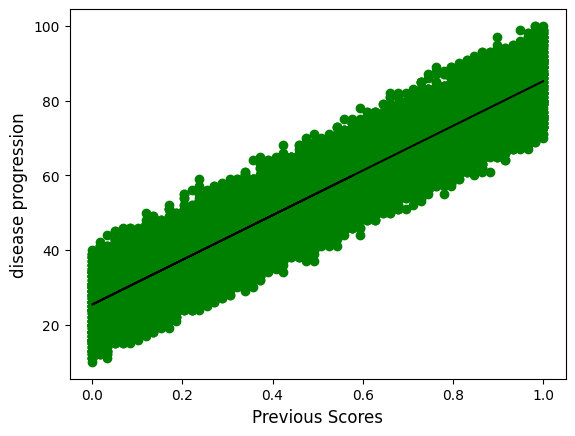

In [68]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = df['Previous Scores'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['Performance Index'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Previous Scores', size=12)
plt.show()

In [69]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [70]:
# Create a linear regression model
modelPR = LinearRegression()

# Fit the model to the data
modelPR.fit(X_p_train, y_p_train)

# Predict the response for a new data point
y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  2.0186
  R2: 0.989
 Adjusted R2: 0.9888
 Cross Validated R2: 0.9885


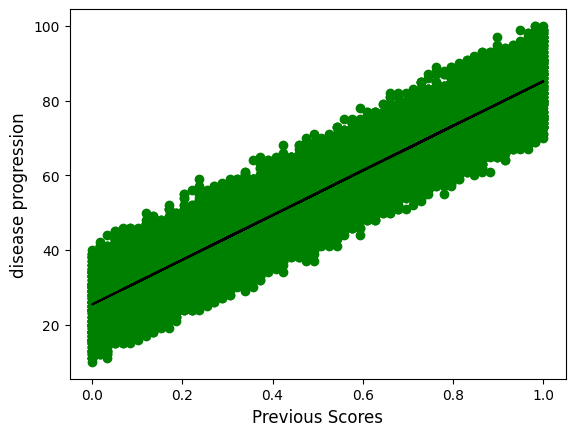

In [72]:
X2 = df['Previous Scores'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = df['Performance Index'].values

poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='k')
plt.ylabel('disease progression', size=12)
plt.xlabel('Previous Scores', size=12)
plt.show()

In [73]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)

In [74]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  3.0254
  R2: 0.9755
 Adjusted R2: 0.9755
 Cross Validated R2: 0.9746


In [75]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  2.3569
  R2: 0.9851
 Adjusted R2: 0.9851
 Cross Validated R2: 0.9853


In [76]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  2.0567
  R2: 0.9887
 Adjusted R2: 0.9887
 Cross Validated R2: 0.9887


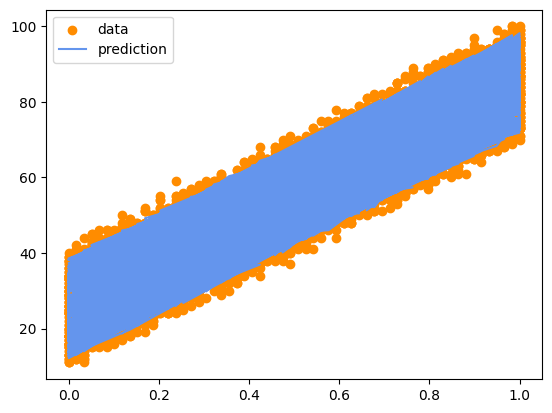

In [79]:
plt.scatter(X_train["Previous Scores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Previous Scores"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [80]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  4.9899
  R2: 0.9334
 Adjusted R2: 0.9332
 Cross Validated R2: 0.9335


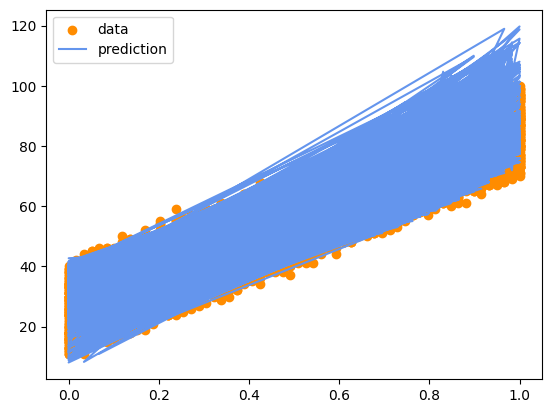

In [81]:
plt.scatter(X_train["Previous Scores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Previous Scores"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [82]:

# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  2.4747
  R2: 0.9836
 Adjusted R2: 0.9836
 Cross Validated R2: 0.9834


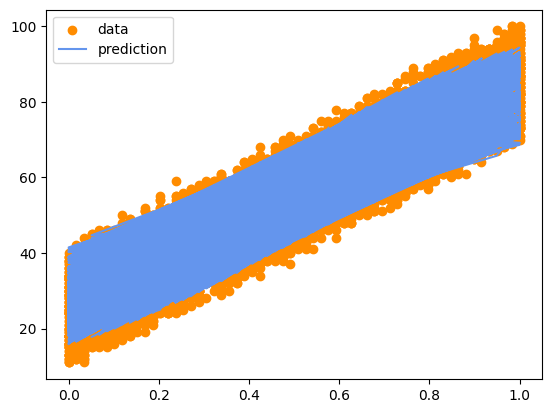

In [83]:
plt.scatter(X_train["Previous Scores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Previous Scores"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [84]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  4.4054
  R2: 0.9481
 Adjusted R2: 0.948
 Cross Validated R2: 0.9485


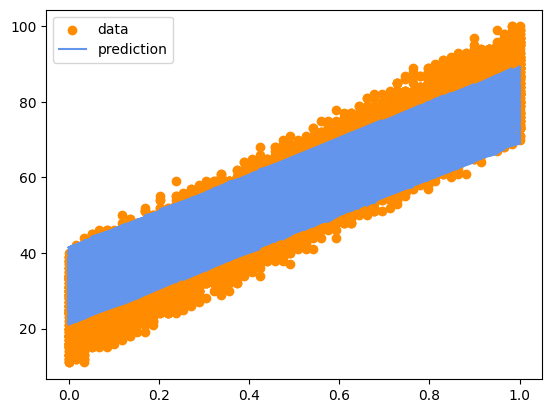

In [86]:
plt.scatter(X_train["Previous Scores"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["Previous Scores"], modelEN.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()